<a href="https://colab.research.google.com/github/SJSUMS/FER2013/blob/main/FER_dataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Facial Expression Classification

0 - Angry
1 - Disgust
2 - Fear
3 - Happy
4 - Sad
5 - Surprise
6 - Neutral


## Data
* [FER2013 CSV](https://www.kaggle.com/deadskull7/fer2013)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

path = '/content/drive/Shareddrives/data 240 Data Mining/FER-2013/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(path + 'fer2013.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
# original csv data
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


## Pre-processing

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from PIL import Image

#### img to array

In [ ]:
data_X = []
for i in range(0,data.shape[0]):
  img = np.array(data['pixels'][i].split(' '))
  
  img = img.reshape(48,48,1)
  img = image.img_to_array(img)
  data_X.append(img)

data_X = np.array(data_X)

In [ ]:
data_X.shape

(35887, 48, 48, 1)

In [ ]:
# label
data_y = np.array(data['emotion'])
data_y = data_y.reshape(-1,1)
data_y.shape

(35887, 1)

#### scaling

In [ ]:
# normaize
data_X /= 255
data_X[0]

array([[[0.27450982],
        [0.3137255 ],
        [0.32156864],
        ...,
        [0.20392157],
        [0.16862746],
        [0.16078432]],

       [[0.25490198],
        [0.23921569],
        [0.22745098],
        ...,
        [0.21960784],
        [0.20392157],
        [0.17254902]],

       [[0.19607843],
        [0.16862746],
        [0.21176471],
        ...,
        [0.19215687],
        [0.21960784],
        [0.18431373]],

       ...,

       [[0.35686275],
        [0.25490198],
        [0.16470589],
        ...,
        [0.28235295],
        [0.21960784],
        [0.16862746]],

       [[0.3019608 ],
        [0.32156864],
        [0.30980393],
        ...,
        [0.4117647 ],
        [0.27450982],
        [0.18039216]],

       [[0.3019608 ],
        [0.28235295],
        [0.32941177],
        ...,
        [0.41568628],
        [0.42745098],
        [0.32156864]]], dtype=float32)

## Save/load data

In [ ]:
# save data
from pickle import dump
dump(data_X, open(path + 'data/X.pkl', 'wb'))
dump(data_y, open(path + 'data/y.pkl', 'wb'))

In [ ]:
# load data
from pickle import load
data_X = load(open(path + 'data/X.pkl', 'rb'))
data_y = load(open(path + 'data/y.pkl', 'rb'))

#### Split dataset

In [ ]:
# 80% train, 10% test
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.1)

# reserve 6000 (~20%) samples for validation
X_val = X_train[-6000:]
y_val = y_train[-6000:]
X_train = X_train[:-6000]
y_train = y_train[:-6000]

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(26298, 48, 48, 1)
(26298, 1)
(6000, 48, 48, 1)
(6000, 1)
(3589, 48, 48, 1)
(3589, 1)


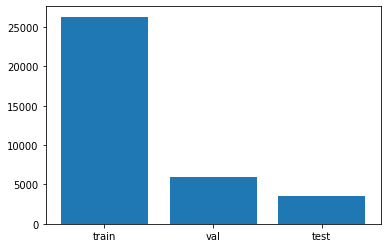

In [ ]:
# plot
labels = ['train','val','test']
freq = [X_train.shape[0],X_val.shape[0],X_test.shape[0]]
plt.bar(labels, freq)
plt.show()

In [ ]:
X_train.shape

(26298, 48, 48, 1)

#### one-hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

# define classes
n_classes = 7

# one-hot encoding
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)
y_test = to_categorical(y_test, n_classes)

## visualize data

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral'])
list(le.classes_)

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

#### data distribution

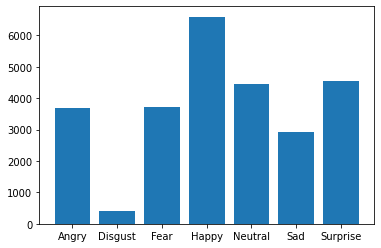

In [ ]:
# label distribution
label_df = pd.DataFrame(y_train.reshape(-1,7))
cat = list(le.classes_)
freq = np.sum(label_df, axis=0)

plt.bar(cat, freq)
plt.show()

#### emotion annotation

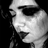

['Neutral']
4


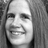

['Happy']
3


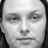

['Surprise']
6


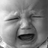

['Neutral']
4


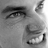

['Angry']
0


In [ ]:
# visualize
for i in range(5):
  display(image.array_to_img(X_train[i]))
  print(le.inverse_transform([np.argmax(y_train[i])]))
  print(np.argmax(y_train[i]))